# Menu

1. [**`# Top-K High-Utility Itemsets From Uncertain Databases`**](#top-k-high-utility-itemsets-from-uncertain-databases)

2. [**`# Import libraries`**](#import-libraries)
3. [**`# Process Data`**](#process-data)
4. [**`# Algorithm ITUFP`**](#algorithm-itufp)
5. [**`# Main`**](#main)


---


# Top-K High-Utility Itemsets From Uncertain Databases

**Mục tiêu**: Thuật toán tìm kiếm các **Top-K High Utility Itemsets** trong cơ sở dữ liệu không chắc chắn (Uncertain Database - UDB). Các itemsets này được chọn dựa trên giá trị hữu ích tổng thể và xác suất xảy ra của chúng.

## Các Khái Niệm Cơ Bản

### 1. **High Utility Itemset Mining (HUIS)**

**HUIS** là một lĩnh vực nghiên cứu trong khai phá dữ liệu, tập trung vào việc tìm kiếm các itemsets có giá trị **hữu ích** (utility) cao trong cơ sở dữ liệu giao dịch. Utility của một itemset được tính dựa trên các yếu tố như giá trị lợi nhuận của các mục và tần suất xuất hiện của chúng trong dữ liệu.

-   **Utility** của một itemset là tổng giá trị của các mục trong itemset đó, với giá trị của mỗi mục được tính dựa trên tần suất xuất hiện và lợi nhuận hoặc giá trị của mục đó trong các giao dịch.
-   **High Utility Itemsets (HUIS)** là những itemsets có tổng utility vượt quá một ngưỡng tối thiểu (min-utility), thường được gọi là **min-utility threshold**.

Các bài toán HUIS rất quan trọng trong các ứng dụng như:

-   **Phân tích dữ liệu giao dịch**: Nhằm tìm các itemsets có giá trị cao nhất cho việc quảng bá sản phẩm hoặc phân tích hành vi khách hàng.
-   **Hệ thống gợi ý sản phẩm**: Để gợi ý các sản phẩm hoặc mục có giá trị cao, được mua nhiều bởi người tiêu dùng.

### 2. **Cơ Sở Dữ Liệu Không Chắc Chắn (Uncertain Database - UDB)**

Cơ sở dữ liệu không chắc chắn là một loại cơ sở dữ liệu trong đó thông tin có sự không chắc chắn, hay nói cách khác, các mục trong cơ sở dữ liệu có thể không xuất hiện trong tất cả các giao dịch với cùng một xác suất. Sự không chắc chắn này có thể phát sinh từ các yếu tố như:

-   **Dữ liệu không đầy đủ**: Một số mục có thể không được ghi lại trong cơ sở dữ liệu với độ chính xác hoàn hảo.
-   **Dữ liệu thiếu xác suất**: Các mục trong cơ sở dữ liệu có thể có các xác suất khác nhau thay vì một giá trị xác định.

Một cơ sở dữ liệu không chắc chắn có thể chứa các thuộc tính sau:

-   **Items**: Các mục có thể xuất hiện trong giao dịch, nhưng không phải tất cả các mục đều có mặt trong tất cả các giao dịch.
-   **Utility**: Giá trị của một mục trong giao dịch, có thể thay đổi dựa trên nhiều yếu tố khác nhau.
-   **Probability**: Xác suất mà một mục sẽ xuất hiện trong một giao dịch nhất định.

Ví dụ, trong một cơ sở dữ liệu bán hàng, các mục có thể là các sản phẩm, và xác suất thể hiện khả năng khách hàng sẽ mua sản phẩm đó.

**Định nghĩa 1:** Mỗi item $x_i$ trong mỗi giao dịch $T_j$ có một xác suất tồn tại $P(x_i, T_j)$ $(0 < P(x_i, T_j) \leq 1)$.

**Định nghĩa 2:** Xác suất tồn tại của một mẫu X trong một giao dịch $T_j$ được xác định bằng cách:
$$P(X, T_j) = \prod_{x \in X} P(x, T_j)$$

**Định nghĩa 3:** Chỉ số kỳ vọng (Expected support) của một mẫu X trong tập dữ liệu không chắc chắn kí hiệu là $expSup(X)$ và được xác định bằng:
$$expSup(X) = \sum_{j = 1}^{|UDB|} (\prod_{x \in X} P(x, T_j)) = \sum_{j = 1}^{|UDB|} (P(X, T_j))$$

<!-- *Ví dụ:*  -->

**Giả thuyết 1:** Với mỗi $Y \subset X$, chỉ số kỳ vọng (expSup) thoả mãn các điều kiện sau:

-   Nếu $expSup(X) \geq minSup$ thì $expSup(Y) \geq minSup$.
-   Nếu $expSup(Y) < minSup$ thì $expSup(X) < minSup$

**Problem statement.** Tập trung vào khai thác Top-K HUIs trên tập dữ liệu không chắc chắn với tiêu chí "xây dựng một lần, khai thác nhiều lần". Cho một tập dữ liệu không chắc chắn UDB và các giá trị K, vấn đề cần giải quyết là tìm kiếm K tập hợp có giá trị hữu ích cao nhất.

### 3. **Top-K High Utility Itemset Mining (Top-K HUIs)**

Top-K High Utility Itemset Mining (Top-K HUIS) là một bài toán trong khai phá dữ liệu mà mục tiêu là tìm ra **K itemsets hữu ích cao nhất** từ cơ sở dữ liệu không chắc chắn, trong đó **K** là một tham số đầu vào được chỉ định.

-   Thuật toán sẽ tìm kiếm các itemsets có tổng giá trị hữu ích (utility) cao nhất trong cơ sở dữ liệu, chọn ra **K itemsets** có giá trị hữu ích cao nhất.
-   Các itemsets này không chỉ được lựa chọn dựa trên tần suất xuất hiện mà còn dựa trên **giá trị hữu ích**, tức là sự kết hợp giữa xác suất và giá trị của các mục trong itemset.

---

## Cấu Trúc Thuật Toán

Thuật toán **ITUFP (Top-K High-Utility Itemset Mining)** hoạt động dựa trên cơ sở dữ liệu không chắc chắn và áp dụng các phương pháp khai phá để tìm ra các **Top-K High Utility Itemsets**.

#### Các bước chính của thuật toán:

1. **Đọc và xử lý dữ liệu**: Thuật toán bắt đầu bằng việc đọc dữ liệu từ cơ sở dữ liệu không chắc chắn (UDB), trong đó mỗi giao dịch chứa các mục, giá trị hữu ích và xác suất của các mục.
2. **Tạo UPLists**: Thuật toán tạo các **UPLists**, là danh sách lưu trữ các mục trong cơ sở dữ liệu cùng với các giá trị hữu ích và xác suất của chúng.
3. **Khai thác các itemsets có giá trị hữu ích cao**: Thuật toán tìm kiếm các itemsets có giá trị hữu ích cao nhất và sắp xếp chúng theo thứ tự giảm dần.
4. **Top-K itemsets**: Dựa trên giá trị hữu ích và các chỉ số như xác suất, thuật toán sẽ chọn ra **K itemsets** có giá trị hữu ích cao nhất.

### **Đánh giá**

Để đánh giá hiệu suất của thuật toán, chúng ta đo **thời gian chạy** và **bộ nhớ sử dụng**.

-   **Thời gian chạy**: Đo lường thời gian mà thuật toán cần để tìm kiếm các Top-K itemsets từ cơ sở dữ liệu không chắc chắn.
-   **Bộ nhớ sử dụng**: Đo lường lượng bộ nhớ mà thuật toán yêu cầu trong suốt quá trình thực thi.

Các chỉ số này giúp người dùng hiểu được hiệu suất của thuật toán khi xử lý các cơ sở dữ liệu có kích thước khác nhau và các giá trị `k` khác nhau.

---

## Cấu Trúc Code Thuật Toán

1. **Lớp `Transaction`**: Đại diện cho một giao dịch trong cơ sở dữ liệu không chắc chắn. Xem chi tiết trong phần [`Process Data`](#process-data).
2. **Lớp `UDB`**: Quản lý dữ liệu và chuyển đổi chúng thành các đối tượng `Transaction`. Xem chi tiết trong phần [`Process Data`](#process-data).
3. **Lớp `UPList`**: Đại diện cho một danh sách các mục (items) trong dữ liệu. Tham khảo chi tiết trong phần [`Algorithm ITUFP`](#algorithm-itufp).
4. **Lớp `IMCUPList`**: Đại diện cho các mẫu kết hợp được tạo ra từ các `UPList` hoặc `IMCUPList`. Tham khảo chi tiết trong phần [`Algorithm ITUFP`](#algorithm-itufp).
5. **Lớp `ITUFP`**: Triển khai thuật toán ITUFP để tìm các Top-K High Utility Itemsets. Tham khảo chi tiết trong phần [`Algorithm ITUFP`](#algorithm-itufp).


# Import libraries


In [2]:
import csv
import time
import os
import psutil
import tracemalloc
import numpy as np
from typing import List, Dict, Any, Tuple, Generator
from collections import defaultdict
import matplotlib.pyplot as plt

# Process Data


In [3]:
class Transaction:
    """Lớp đại diện cho một giao dịch trong dữ liệu không chắc chắn."""

    def __init__(
        self,
        id: int,
        items: List[int],
        utilities: List[float],
        probabilities: List[float],
    ) -> None:
        """Khởi tạo một giao dịch với id, items, utilities và probabilities cho mỗi item.

        Parameters
        ----------
        id : int
            Id của giao dịch.
        items : List[int]
            Danh sách các item trong giao dịch.
        utilities : List[float]
            Danh sách các giá trị của các item trong giao dịch.
        probabilities : List[float]
            Danh sách xác suất của các item trong giao dịch.

        Examples
        --------
        In [1]: transaction = Transaction(
        ...     id=1,
        ...     items=[1, 2, 3],
        ...     utilities=[10, 20, 30],
        ...     probabilities=[0.5, 0.3, 0.2]
        ... )
        In [2]: transaction.id
        Out[2]: 1
        In [3]: transaction.items
        Out[3]: [1, 2, 3]
        In [4]: transaction.utilities
        Out[4]: [10, 20, 30]
        In [5]: transaction.probabilities
        Out[5]: [0.5, 0.3, 0.2]
        """
        self.id: int = id
        self.items: List[int] = items
        self.utilities: List[int] = utilities
        self.probabilities: List[float] = probabilities

    def to_dict(self) -> Dict[str, Any]:
        """Trả về giao dịch dưới dạng Dictionary.

        Returns
        -------
        Dict[str, Any]
            Dictionary chứa thông tin của giao dịch.

        Examples
        --------
        In [1]: transaction = Transaction(
        ...     id=1,
        ...     items=[1, 2, 3],
        ...     utilities=[10, 20, 30],
        ...     probabilities=[0.5, 0.3, 0.2]
        ... )
        In [2]: transaction.to_dict()
        Out[2]: {'id': 1, 'items': [1, 2, 3], 'utilities': [10, 20, 30], 'probabilities': [0.5, 0.3, 0.2]}
        """
        return {
            "id": self.id,
            "items": self.items,
            "utilities": self.utilities,
            "probabilities": self.probabilities,
        }

    def __repr__(self) -> str:
        """Trả về một chuỗi biểu diễn của đối tượng Transaction.

        Returns
        -------
        str
            Chuỗi biểu diễn của đối tượng Transaction.

        Examples
        --------
        In [1]: transaction = Transaction(
        ...     id=1,
        ...     items=[1, 2, 3],
        ...     utilities=[10, 20, 30],
        ...     probabilities=[0.5, 0.3, 0.2]
        ... )
        In [2]: transaction
        Out[2]: Transaction(1, [1, 2, 3], [10, 20, 30], [0.5, 0.3, 0.2])
        """
        return f"Transaction({self.id}, {self.items}, {self.utilities}, {self.probabilities})"

In [4]:
class UDB:
    """Lớp quản lý cơ sở dữ liệu không chắc chắn."""

    def __init__(self, file_path: str) -> None:
        """Khởi tạo một cơ sở dữ liệu không chắc chắn với đường dẫn file.

        Parameters
        ----------
        file_path : str
            Đường dẫn file chứa dữ liệu không chắc chắn.

        Examples
        --------
        In [1]: udb = UDB("sample_data.csv")
        """
        self.file_path: str = file_path

    def read_file(self) -> Generator[Transaction, None, None]:
        """Đọc file và tạo Generator chứa các đối tượng Transaction.

        Returns
        -------
        Generator[Transaction, None, None]
            Generator chứa các đối tượng Transaction.

        Examples
        --------
        In [1]: udb = UDB("sample_data.csv")
        In [2]: for transaction in udb.read_file():
        ...:     print(transaction)
        Transaction(1, [1, 2, 3], [10.0, 20.0, 30.0], [0.5, 0.3, 0.2])
        Transaction(2, [4, 5], [40.0, 50.0], [0.7, 0.3])
        Transaction(3, [6, 7, 8], [60.0, 70.0, 80.0], [0.4, 0.3, 0.3])
        """
        with open(self.file_path, "r") as file:
            csv_reader = csv.DictReader(file)
            for id, row in enumerate(csv_reader, start=1):
                try:
                    # Chuyển đổi các chuỗi thành danh sách
                    items = list(map(int, row["items"].split()))
                    utilities = list(map(float, row["item_utilities"].split()))
                    probabilities = list(map(float, row["item_probabilities"].split()))

                    # Kiểm tra tính hợp lệ
                    if len(items) != len(utilities) or len(items) != len(probabilities):
                        raise ValueError(
                            "The length of items, utilities, and probabilities must be the same."
                        )
                    if not all(0 <= p <= 1 for p in probabilities):
                        raise ValueError(
                            "The probabilities must be in the range [0, 1]."
                        )

                    # Trả về từng giao dịch dưới dạng Generator
                    yield Transaction(id, items, utilities, probabilities)
                except Exception as e:
                    print(f"Error at line {id}: {e}")

    def get_transactions(self) -> List[Transaction]:
        """Trả về một danh sách các giao dịch từ file.

        Returns
        -------
        List[Transaction]
            Danh sách các giao dịch.

        Examples
        --------
        In [1]: udb = UDB("sample_data.csv")
        In [2]: udb.get_transactions()
        Out[2]: [
            Transaction(1, [1, 2, 3], [10.0, 20.0, 30.0], [0.5, 0.3, 0.2]),
            Transaction(2, [4, 5], [40.0, 50.0], [0.7, 0.3]),
            Transaction(3, [6, 7, 8], [60.0, 70.0, 80.0], [0.4, 0.3, 0.3])
        ]
        """
        return list(self.read_file())

# Algorithm ITUFP


In [5]:
class UPList:
    """Lớp đại diện cho UP-List."""

    def __init__(self, item_name: str) -> None:
        """Khởi tạo UPList

        Parameters
        ----------
        item_name : str
            Tên của mục.

        Examples
        --------
        In [1]: uplist = UPList("item1")
        """
        self.item_name: str = item_name
        # List các entry (tid, probability, utility)
        self.entries: List[Tuple[int, float, float]] = []
        self.total_utility: float = 0.0
        self.exp_support: float = 0.0

    def add_entry(self, tid: int, probability: float, utility: float) -> None:
        """Thêm một entry vào UP-List.

        Parameters
        ----------
        tid : int
            ID của giao dịch.
        probability : float
            Xác suất của mục trong giao dịch.
        utility : float
            Giá trị hữu ích của mục trong giao dịch.

        Examples
        --------
        In [1]: uplist = UPList("item1")
        In [2]: uplist.add_entry(1, 0.5, 10)
        In [3]: uplist
        Out[3]: UPList(item1: [(1, 0.5, 10)], Total Utility: 10, Expected Support: 0.5)
        """
        self.entries.append((tid, probability, utility))
        self.total_utility += utility
        self.exp_support += probability

    def __repr__(self) -> str:
        """Trả về chuỗi đại diện cho UP-List.

        Returns
        ----------
        str
            Chuỗi đại diện cho UP-List.

        Examples
        --------
        In [1]: uplist = UPList("item1")
        In [2]: uplist.add_entry(1, 0.5, 10)
        In [3]: uplist
        Out[3]: UPList(item1: [(1, 0.5, 10)], Total Utility: 10, Expected Support: 0.5)
        """
        return (
            f"UPList({self.item_name}: {self.entries}, "
            f"Total Utility: {self.total_utility}, "
            f"Expected Support: {self.exp_support})"
        )

In [6]:
class UplistManager:
    """Lớp quản lý các UPLists, hỗ trợ truy xuất và xử lý."""

    def __init__(self, up_lists: List[UPList]) -> None:
        """Khởi tạo UplistManager với danh sách UPList.

        Examples
        --------
        In [1]: uplist1 = UPList("item1")
        ...: uplist1.add_entry(1, 0.5, 10)
        In [2]: uplist2 = UPList("item2")
        ...: uplist2.add_entry(2, 0.3, 20)
        In [3]: uplist_manager = UplistManager([uplist1, uplist2])
        """
        self.up_lists: List[UPList] = up_lists

    def get_uplist(self, item_name: int) -> UPList:
        """Lấy UPList theo tên mục.

        Parameters
        ----------
        item_name : int
            Tên của mục (item_name).

        Returns
        -------
        UPList
            UPList tương ứng với item_name.

        Raises
        ------
        ValueError
            Nếu không tìm thấy UPList với item_name.

        Examples
        --------
        In [1]: uplist1 = UPList("item1")
        ...: uplist1.add_entry(1, 0.5, 10)
        In [2]: uplist2 = UPList("item2")
        ...: uplist2.add_entry(2, 0.3, 20)
        In [3]: uplist_manager = UplistManager([uplist1, uplist2])
        In [4]: uplist_manager.get_uplist("item1")
        Out[4]: UPList(item1: [(1, 0.5, 10)], Total Utility: 10, Expected Support: 0.5)
        """
        for uplist in self.up_lists:
            if uplist.item_name == item_name:
                return uplist
        raise ValueError(f"UPList with item_name {item_name} not found.")

In [7]:
class IMCUPList:
    """Lớp đại diện cho IMCUP-List, lưu trữ các mẫu kết hợp và utilities của chúng."""

    def __init__(self, pattern_name: str) -> None:
        """Khởi tạo IMCUP-List với tên mẫu.

        Parameters
        ----------
        pattern_name : str
            Tên của mẫu.

        Examples
        --------
        In [1]: imcuplist = IMCUPList("pattern1")
        """
        self.pattern_name: str = pattern_name
        # List các entry (tid, probability, utility)
        self.entries: List[Tuple[int, float, float]] = []
        self.total_utility: float = 0.0
        self.exp_support: float = 0.0

    def construct(
        self,
        list1: UPList or "IMCUPList",  # type: ignore
        list2: UPList or "IMCUPList",  # type: ignore
        prefix_indices: List[int],
        uplist_manager: List[UPList],
    ) -> None:
        """
        Tạo IMCUP-List bằng cách kết hợp hai danh sách (IMCUPList hoặc UPList).

        Parameters
        ----------
        list1 : IMCUPList or UPList
            Danh sách đầu tiên.
        list2 : IMCUPList or UPList
            Danh sách thứ hai.
        prefix_indices : List[int]
            Danh sách các chỉ số của các mục cần làm tiền tố.
        uplist_manager : UPListManager
            Lớp quản lý UPLists.

        Examples
        --------
        In [1]: uplist1 = UPList("item1")
        ...: uplist1.add_entry(1, 0.5, 10)
        In [2]: uplist2 = UPList("item2")
        ...: uplist2.add_entry(2, 0.3, 20)
        In [3]: imcuplist = IMCUPList("pattern1")
        In [4]: imcuplist.construct(uplist1, uplist2, [], [])
        In [5]: imcuplist
        Out[5]: IMCUPList(pattern1: [(1, 0.5, 10), (2, 0.3, 20)], Total Utility: 30, Expected Support: 0.15)
        """
        idx1: int = 0
        idx2: int = 0

        # Lấy danh sách UPLists của các tiền tố (nếu có)
        prefix_lists: List[UPList] = [
            uplist_manager.get_uplist(i) for i in prefix_indices
        ]

        while idx1 < len(list1.entries) and idx2 < len(list2.entries):
            tid1, prob1, util1 = list1.entries[idx1]
            tid2, prob2, util2 = list2.entries[idx2]

            if tid1 == tid2:  # Nếu cùng giao dịch (TID)
                combined_prob = prob1 * prob2
                combined_util = util1 + util2

                # Loại bỏ utility trùng lặp từ các tiền tố
                for prefix_list in prefix_lists:
                    for tid_prefix, prob_prefix, util_prefix in prefix_list.entries:
                        if tid_prefix == tid1:
                            combined_prob /= prob_prefix
                            combined_util -= util_prefix
                            break

                # Cập nhật vào IMCUPList
                self.entries.append((tid1, combined_prob, combined_util))
                self.total_utility += combined_util
                self.exp_support += combined_prob

                idx1 += 1
                idx2 += 1
            elif tid1 < tid2:
                idx1 += 1
            else:
                idx2 += 1

    def __repr__(self) -> str:
        """Trả về chuỗi đại diện cho IMCUP-List.

        Returns
        -------
        str
            Chuỗi đại diện cho IMCUP-List.

        Examples
        --------
        In [1]: uplist1 = UPList("item1")
        ...: uplist1.add_entry(1, 0.5, 10)
        In [2]: uplist2 = UPList("item2")
        ...: uplist2.add_entry(2, 0.3, 20)
        In [3]: imcuplist = IMCUPList("pattern1")
        In [4]: imcuplist.construct(uplist1, uplist2, [], [])
        In [5]: imcuplist
        Out[5]: IMCUPList(pattern1: [(1, 0.5, 10), (2, 0.3, 20)], Total Utility: 30, Expected Support: 0.15)
        """
        return (
            f"IMCUPList({self.pattern_name}: {self.entries}, "
            f"Total Utility: {self.total_utility}, "
            f"Expected Support: {self.exp_support})"
        )

In [8]:
class ITUFP:
    """Thuật toán ITUFP để khai thác Top-K High-Utility Itemsets từ cơ sở dữ liệu không chắc chắn."""

    def __init__(self, udb: UDB, k: int):
        """Khởi tạo đối tượng ITUFP.

        Parameters
        -----------
        udb : UDB
            Cơ sở dữ liệu không chắc chắn.
        k : int
            Số lượng Top-K High-Utility Itemsets cần tìm.

        Examples
        --------
        In [1]: udb = UDB("sample_data.csv")
        ...: itufp = ITUFP(udb, 5)
        """

        self.udb: UDB = udb
        self.k: int = k
        self.top_k: List[Tuple[str, float, float]] = []
        self.min_sup: float = 0.0

        # Tạo danh sách UPLists
        self.uplist_manager: UplistManager = self.generate_up_lists()
        self._pattern_indices: Dict[str, List[int]] = {}

    def generate_up_lists(self) -> UplistManager:
        """Tạo danh sách UPLists từ cơ sở dữ liệu UDB và sắp xếp theo expSupport (giảm dần).

        Returns
        -------
        UplistManager
            Lớp quản lý UPLists.

        Examples
        --------
        In [1]: udb = UDB("sample_data.csv")
        ...: itufp = ITUFP(udb, 5)
        ...: uplist_manager = itufp.generate_up_lists()
        """

        up_lists: Dict[int, UPList] = defaultdict(lambda: UPList(item_name=""))

        for transaction in self.udb.get_transactions():
            for item, prob, util in zip(
                transaction.items, transaction.probabilities, transaction.utilities
            ):
                if not up_lists[item].item_name:
                    up_lists[item].item_name = item
                up_lists[item].add_entry(transaction.id, prob, util)

        return UplistManager(
            sorted(up_lists.values(), key=lambda x: x.exp_support, reverse=True)
        )

    def find_prefix_indices(self, pattern1: str, pattern2: str) -> List[int]:
        """Tìm danh sách các mục tiền tố trùng lặp giữa hai mẫu.

        Parameters
        ----------
        pattern1 : str
            Tên của mẫu thứ nhất.
        pattern2 : str
            Tên của mẫu thứ hai.

        Returns
        -------
        List[int]
            Danh sách các mục trùng lặp theo thứ tự xuất hiện.

        Examples
        --------
        In [1]: itufp = ITUFP(udb, 5)
        ...: itufp.find_prefix_indices("1,2,3", "1,2,4")
        Out[1]: [1, 2]
        """
        key: str = f"{pattern1}_{pattern2}"
        if key not in self._pattern_indices:
            items1 = tuple(map(int, pattern1.split(",")))
            items2 = tuple(map(int, pattern2.split(",")))
            self._pattern_indices[key] = [item for item in items1 if item in items2]
        return self._pattern_indices[key]

    def mine_patterns(self, uplist_manager: UplistManager) -> None:
        """Đệ quy khai thác các tổ hợp từ UPLists và IMCUPLists.

        Parameters
        ----------
        uplist_manager : UplistManager
            Lớp quản lý UPLists.

        Examples
        --------
        In [1]: itufp = ITUFP(udb, 5)
        ...: itufp.mine_patterns(itufp.uplist_manager)
        """

        imcup_lists: List[IMCUPList] = []
        up_lists: List[UPList] = uplist_manager.up_lists

        # Lọc các UPLists có expSupport > minSup
        valid_indices = [
            i for i, up in enumerate(up_lists) if up.exp_support > self.min_sup
        ]

        # Tạo IMCUPLists từ các cặp UPLists
        for i in valid_indices:
            for j in range(i + 1, len(valid_indices)):
                idx_j = valid_indices[j]

                # Early pruning cho cặp items
                if (
                    up_lists[i].exp_support * up_lists[idx_j].exp_support
                    <= self.min_sup
                ):
                    continue

                imcup = IMCUPList(
                    f"{uplist_manager.up_lists[i].item_name},{uplist_manager.up_lists[j].item_name}"
                )

                imcup.construct(
                    uplist_manager.up_lists[i],
                    uplist_manager.up_lists[j],
                    [],
                    uplist_manager,
                )

                if imcup.exp_support <= self.min_sup:
                    continue

                imcup_lists.append(imcup)

                self._update_top_k(imcup)

        if imcup_lists:
            self.itufp_growth(imcup_lists, uplist_manager)

    def _update_top_k(self, item: UPList or IMCUPList) -> None:  # type: ignore
        """Cập nhật Top-K High-Utility Itemsets.

        Parameters
        ----------
        item : UPList or IMCUPList
            UPList hoặc IMCUPList cần cập nhật.

        Examples
        --------
        In [1]: itufp = ITUFP(udb, 5)
        ...: uplist_manager = itufp.generate_up_lists()
        ...: uplist = uplist_manager.get_uplist("item1")
        ...: itufp._update_top_k(uplist)
        """

        pattern_name = item.item_name if isinstance(item, UPList) else item.pattern_name
        entry = (pattern_name, item.total_utility, item.exp_support)

        self.top_k.append(entry)
        self.top_k.sort(key=lambda x: x[1], reverse=True)

        if len(self.top_k) > self.k:
            self.top_k.pop()
            self.min_sup = self.top_k[-1][2]

    def itufp_growth(
        self,
        imcup_lists: List[IMCUPList],
        uplist_manager: UplistManager,
    ) -> None:
        """Đệ quy mở rộng khai thác các tổ hợp dài hơn từ IMCUPLists.

        Parameters
        ----------
        imcup_lists : List[IMCUPList]
            Danh sách các IMCUPLists cần mở rộng.
        uplist_manager : UplistManager
            Lớp quản lý UPLists.

        Examples
        --------
        In [1]: itufp = ITUFP(udb, 5)
        ...: itufp.itufp_growth(imcup_lists, uplist_manager)
        """

        next_level: List[IMCUPList] = []

        # Early pruning với min_sup
        valid_imcups = [
            imcup for imcup in imcup_lists if imcup.exp_support > self.min_sup
        ]

        for i, imcup1 in enumerate(valid_imcups):
            prefix1 = tuple(imcup1.pattern_name.split(",")[:-1])

            for imcup2 in valid_imcups[i + 1 :]:
                if tuple(imcup2.pattern_name.split(",")[:-1]) != prefix1:
                    continue

                new_pattern_name = (
                    f"{imcup1.pattern_name},{imcup2.pattern_name.split(',')[-1]}"
                )

                new_imcup = IMCUPList(new_pattern_name)

                # Tìm prefix indices
                prefix_indices = self.find_prefix_indices(
                    imcup1.pattern_name, imcup2.pattern_name
                )

                new_imcup.construct(imcup1, imcup2, prefix_indices, uplist_manager)

                if new_imcup.exp_support <= self.min_sup:
                    continue

                next_level.append(new_imcup)

                self._update_top_k(new_imcup)

        if next_level:
            self.itufp_growth(next_level, uplist_manager)

    def run(self) -> List[Tuple[str, float, float, float]]:
        """Chạy thuật toán ITUFP để tìm Top-K High-Utility Itemsets.

        Returns
        -------
        List[Tuple[str, float, float, float]]
            Danh sách các High-Utility Itemsets với tên, tổng utility, expSupport và minSup.

        Examples
        --------
        In [1]: itufp = ITUFP(udb, 5)
        ...: itufp.run()
        """

        # Khai thác 1-itemsets
        valid_uplists = [
            up for up in self.uplist_manager.up_lists if up.exp_support > self.min_sup
        ]

        for uplist in valid_uplists:
            self._update_top_k(uplist)

        # Khai thác các tổ hợp dài hơn
        self.mine_patterns(self.uplist_manager)

        return self.top_k

# Main


In [9]:
def save_results_to_file(
    file_path: str,
    results: List[Tuple[str, float, float]],
    k: int,
    elapsed_time: float,
    memory_usage: float,
) -> None:
    """
    Lưu kết quả Top-K High-Utility Itemsets vào tệp .txt.

    Parameters:
    ----------
    file_path : str
        Đường dẫn tệp đầu ra.
    results : List[Tuple[str, float, float]]
        Kết quả Top-K High-Utility Itemsets.
    k : int
        Số lượng Top-K High-Utility Itemsets cần lưu.
    elapsed_time : float
        Thời gian chạy thuật toán.
    memory_usage : float
        Bộ nhớ sử dụng khi chạy thuật toán.

    Examples:
    --------
    In [1]: save_results_to_file("results.txt", results, 5, 10.0, 20.0)
    """
    with open(file_path, "w") as f:
        f.write("Results of ITUFP Algorithm\n")
        f.write("=" * 50 + "\n")
        f.write(f"Top-{k} High-Utility Itemsets:\n")
        f.write("=" * 50 + "\n")
        for idx, (itemset, total_utility, exp_support) in enumerate(results, start=1):
            f.write(
                f"{idx}. Itemset: {itemset} | Total Utility: {total_utility:.2f} | "
                f"Expected Support: {exp_support:.2f}\n"
            )
        f.write("=" * 50 + "\n")
        f.write(f"Execution Time: {elapsed_time:.2f} seconds\n")
        f.write(f"Memory Usage: {memory_usage:.2f} MB\n")
        f.write("=" * 50 + "\n")


def main(file_path: str, k: int = 20) -> None:
    """Chạy thuật toán ITUFP và in kết quả Top-K High-Utility Itemsets từ cơ sở dữ liệu UDB.

    Parameters:
    ----------
    file_path : str
        Đường dẫn đến tệp dữ liệu.
    k : int, optional
        Số lượng Top-K High-Utility Itemsets cần tìm, mặc định là 20.

    Examples:
    --------
    In [1]: main("sample_data.csv", 5)
    """

    # Tạo đối tượng UDB từ file path
    udb = UDB(file_path)

    # Đo thời gian và bộ nhớ trước khi chạy thuật toán
    start_time = time.time()
    process = psutil.Process()
    memory_before = process.memory_info().rss / (1024 * 1024)

    # Tạo đối tượng ITUFP và chạy thuật toán
    itufp = ITUFP(udb, k)
    results = itufp.run()

    # Đo thời gian và bộ nhớ sau khi chạy thuật toán
    end_time = time.time()
    memory_after = process.memory_info().rss / (1024 * 1024)
    elapsed_time = end_time - start_time
    memory_usage = memory_after - memory_before

    # In kết quả Top-K High-Utility Itemsets
    print("==" * 40)
    print("Top-K High-Utility Itemsets:")
    for idx, (itemset, total_utility, exp_support) in enumerate(results, start=1):
        print(
            f"{idx}. Itemset: {itemset} | Total Utility: {total_utility:.2f} | "
            f"Expected Support: {exp_support:.2f}"
        )

    # In thời gian chạy và bộ nhớ sử dụng
    print(f"\nExecution Time: {elapsed_time:.2f} seconds")
    print(f"Memory Usage: {memory_usage:.2f} MB")

    # Lưu kết quả vào file
    file_name = os.path.basename(file_path).split(".")[0] + "_results.txt"
    save_results_to_file(file_name, results, k, elapsed_time, memory_usage)
    print(f"Results saved to {file_name}")

## Kiểm tra với tập mẫu


In [10]:
file_path = "./Uncertain_DB/sample_data.csv"
main(file_path, k=20)

Top-K High-Utility Itemsets:
1. Itemset: 3,4 | Total Utility: 270.00 | Expected Support: 0.83
2. Itemset: 1,2 | Total Utility: 210.00 | Expected Support: 1.67
3. Itemset: 1,2,3 | Total Utility: 210.00 | Expected Support: 0.81
4. Itemset: 3 | Total Utility: 190.00 | Expected Support: 2.40
5. Itemset: 1,3 | Total Utility: 190.00 | Expected Support: 1.08
6. Itemset: 2,3 | Total Utility: 190.00 | Expected Support: 1.19
7. Itemset: 4 | Total Utility: 160.00 | Expected Support: 2.30
8. Itemset: 2,3,4 | Total Utility: 160.00 | Expected Support: 0.22
9. Itemset: 1,2,3,4 | Total Utility: 140.00 | Expected Support: 0.07
10. Itemset: 1 | Total Utility: 130.00 | Expected Support: 3.00
11. Itemset: 1,3,4 | Total Utility: 120.00 | Expected Support: 0.18
12. Itemset: 2 | Total Utility: 110.00 | Expected Support: 2.60
13. Itemset: 1,2,4 | Total Utility: 110.00 | Expected Support: 0.14
14. Itemset: 2,4 | Total Utility: 100.00 | Expected Support: 0.48
15. Itemset: 1,4 | Total Utility: 90.00 | Expected S

## Kiểm tra với tập Chess


In [83]:
file_path = "./Uncertain_DB/processed_chess_utility_spmf.csv"
main(file_path, k=300)

Top-K High-Utility Itemsets:
1. Itemset: 40,48 | Total Utility: 293650.00 | Expected Support: 770.89
2. Itemset: 52,40 | Total Utility: 292440.00 | Expected Support: 822.98
3. Itemset: 40,34 | Total Utility: 279933.00 | Expected Support: 784.40
4. Itemset: 40,29 | Total Utility: 258883.00 | Expected Support: 808.53
5. Itemset: 40,60 | Total Utility: 255739.00 | Expected Support: 806.44
6. Itemset: 40,66 | Total Utility: 245690.00 | Expected Support: 770.20
7. Itemset: 40,56 | Total Utility: 245670.00 | Expected Support: 788.05
8. Itemset: 40,7 | Total Utility: 233117.00 | Expected Support: 771.59
9. Itemset: 40,3 | Total Utility: 229034.00 | Expected Support: 733.24
10. Itemset: 40,5 | Total Utility: 225301.00 | Expected Support: 777.34
11. Itemset: 40,72 | Total Utility: 216269.00 | Expected Support: 587.43
12. Itemset: 40,64 | Total Utility: 214779.00 | Expected Support: 684.93
13. Itemset: 52,48 | Total Utility: 214110.00 | Expected Support: 769.02
14. Itemset: 40,58 | Total Utility

## Kiểm tra trên tập FoodMart


In [86]:
file_path = "./Uncertain_DB/processed_foodmart_spmf.csv"
main(file_path, k=300)

Top-K High-Utility Itemsets:
1. Itemset: 1373 | Total Utility: 25560.00 | Expected Support: 12.24
2. Itemset: 1292 | Total Utility: 24642.00 | Expected Support: 12.14
3. Itemset: 988 | Total Utility: 24187.00 | Expected Support: 9.94
4. Itemset: 225 | Total Utility: 22951.00 | Expected Support: 8.39
5. Itemset: 222 | Total Utility: 22910.00 | Expected Support: 7.71
6. Itemset: 272 | Total Utility: 22678.00 | Expected Support: 12.84
7. Itemset: 1426 | Total Utility: 21692.00 | Expected Support: 10.78
8. Itemset: 1161 | Total Utility: 21540.00 | Expected Support: 8.29
9. Itemset: 1045 | Total Utility: 21090.00 | Expected Support: 7.26
10. Itemset: 446 | Total Utility: 20625.00 | Expected Support: 6.92
11. Itemset: 83 | Total Utility: 20563.00 | Expected Support: 8.23
12. Itemset: 1518 | Total Utility: 20416.00 | Expected Support: 8.76
13. Itemset: 1180 | Total Utility: 19890.00 | Expected Support: 6.00
14. Itemset: 1012 | Total Utility: 19861.00 | Expected Support: 11.06
15. Itemset: 175

## Kiểm tra với tập Retail


In [87]:
file_path = "./Uncertain_DB/processed_retail_utility_spmf.csv"
main(file_path, k=300)

Top-K High-Utility Itemsets:
1. Itemset: 40,49 | Total Utility: 481021.00 | Expected Support: 7374.69
2. Itemset: 49 | Total Utility: 463274.00 | Expected Support: 21320.30
3. Itemset: 40 | Total Utility: 278489.00 | Expected Support: 25538.01
4. Itemset: 33 | Total Utility: 251640.00 | Expected Support: 7647.21
5. Itemset: 40,42 | Total Utility: 250893.00 | Expected Support: 2852.89
6. Itemset: 49,42 | Total Utility: 248294.00 | Expected Support: 2302.43
7. Itemset: 42 | Total Utility: 246819.00 | Expected Support: 7482.03
8. Itemset: 40,49,42 | Total Utility: 243161.00 | Expected Support: 931.66
9. Itemset: 49,33 | Total Utility: 221755.00 | Expected Support: 2074.01
10. Itemset: 40,33 | Total Utility: 186201.00 | Expected Support: 2155.12
11. Itemset: 40,49,33 | Total Utility: 178718.00 | Expected Support: 704.92
12. Itemset: 49,39 | Total Utility: 174526.00 | Expected Support: 2054.43
13. Itemset: 39 | Total Utility: 169948.00 | Expected Support: 7968.31
14. Itemset: 40,39 | Total 

## Kiểm tra với tập Connect


In [88]:
file_path = "./Uncertain_DB/processed_connect_utility_spmf.csv"
main(file_path, k=300)

Top-K High-Utility Itemsets:
1. Itemset: 75,72 | Total Utility: 5806464.00 | Expected Support: 16735.94
2. Itemset: 75,52 | Total Utility: 5342426.00 | Expected Support: 16462.20
3. Itemset: 109,75 | Total Utility: 4803838.00 | Expected Support: 17127.86
4. Itemset: 75,19 | Total Utility: 4773186.00 | Expected Support: 16914.86
5. Itemset: 109,72 | Total Utility: 4719570.00 | Expected Support: 16835.55
6. Itemset: 75,82 | Total Utility: 4430327.00 | Expected Support: 15819.93
7. Itemset: 109,52 | Total Utility: 4298532.00 | Expected Support: 16589.12
8. Itemset: 75,34 | Total Utility: 4284116.00 | Expected Support: 16462.04
9. Itemset: 91,75 | Total Utility: 4060910.00 | Expected Support: 17153.42
10. Itemset: 75,13 | Total Utility: 4039712.00 | Expected Support: 15589.51
11. Itemset: 37,75 | Total Utility: 4036341.00 | Expected Support: 17053.89
12. Itemset: 91,72 | Total Utility: 3988983.00 | Expected Support: 16800.39
13. Itemset: 37,72 | Total Utility: 3964157.00 | Expected Support

## Trực quan dữ liệu


Dataset: ./Uncertain_DB/processed_chess_utility_spmf.csv, K: 30
 Time started: 1734891536.92s, Time ended: 1734891565.20s, Time elapsed: 28.28s
 Peak memory usage: 19.17MB
Dataset: ./Uncertain_DB/processed_chess_utility_spmf.csv, K: 70
 Time started: 1734891565.25s, Time ended: 1734891608.75s, Time elapsed: 43.50s
 Peak memory usage: 18.69MB
Dataset: ./Uncertain_DB/processed_chess_utility_spmf.csv, K: 150
 Time started: 1734891608.80s, Time ended: 1734891656.47s, Time elapsed: 47.67s
 Peak memory usage: 36.77MB
Dataset: ./Uncertain_DB/processed_chess_utility_spmf.csv, K: 300
 Time started: 1734891656.53s, Time ended: 1734891712.03s, Time elapsed: 55.51s
 Peak memory usage: 68.27MB
Dataset: ./Uncertain_DB/processed_foodmart_spmf.csv, K: 30
 Time started: 1734891712.09s, Time ended: 1734891713.96s, Time elapsed: 1.86s
 Peak memory usage: 4.76MB
Dataset: ./Uncertain_DB/processed_foodmart_spmf.csv, K: 70
 Time started: 1734891713.98s, Time ended: 1734891718.13s, Time elapsed: 4.16s
 Peak m

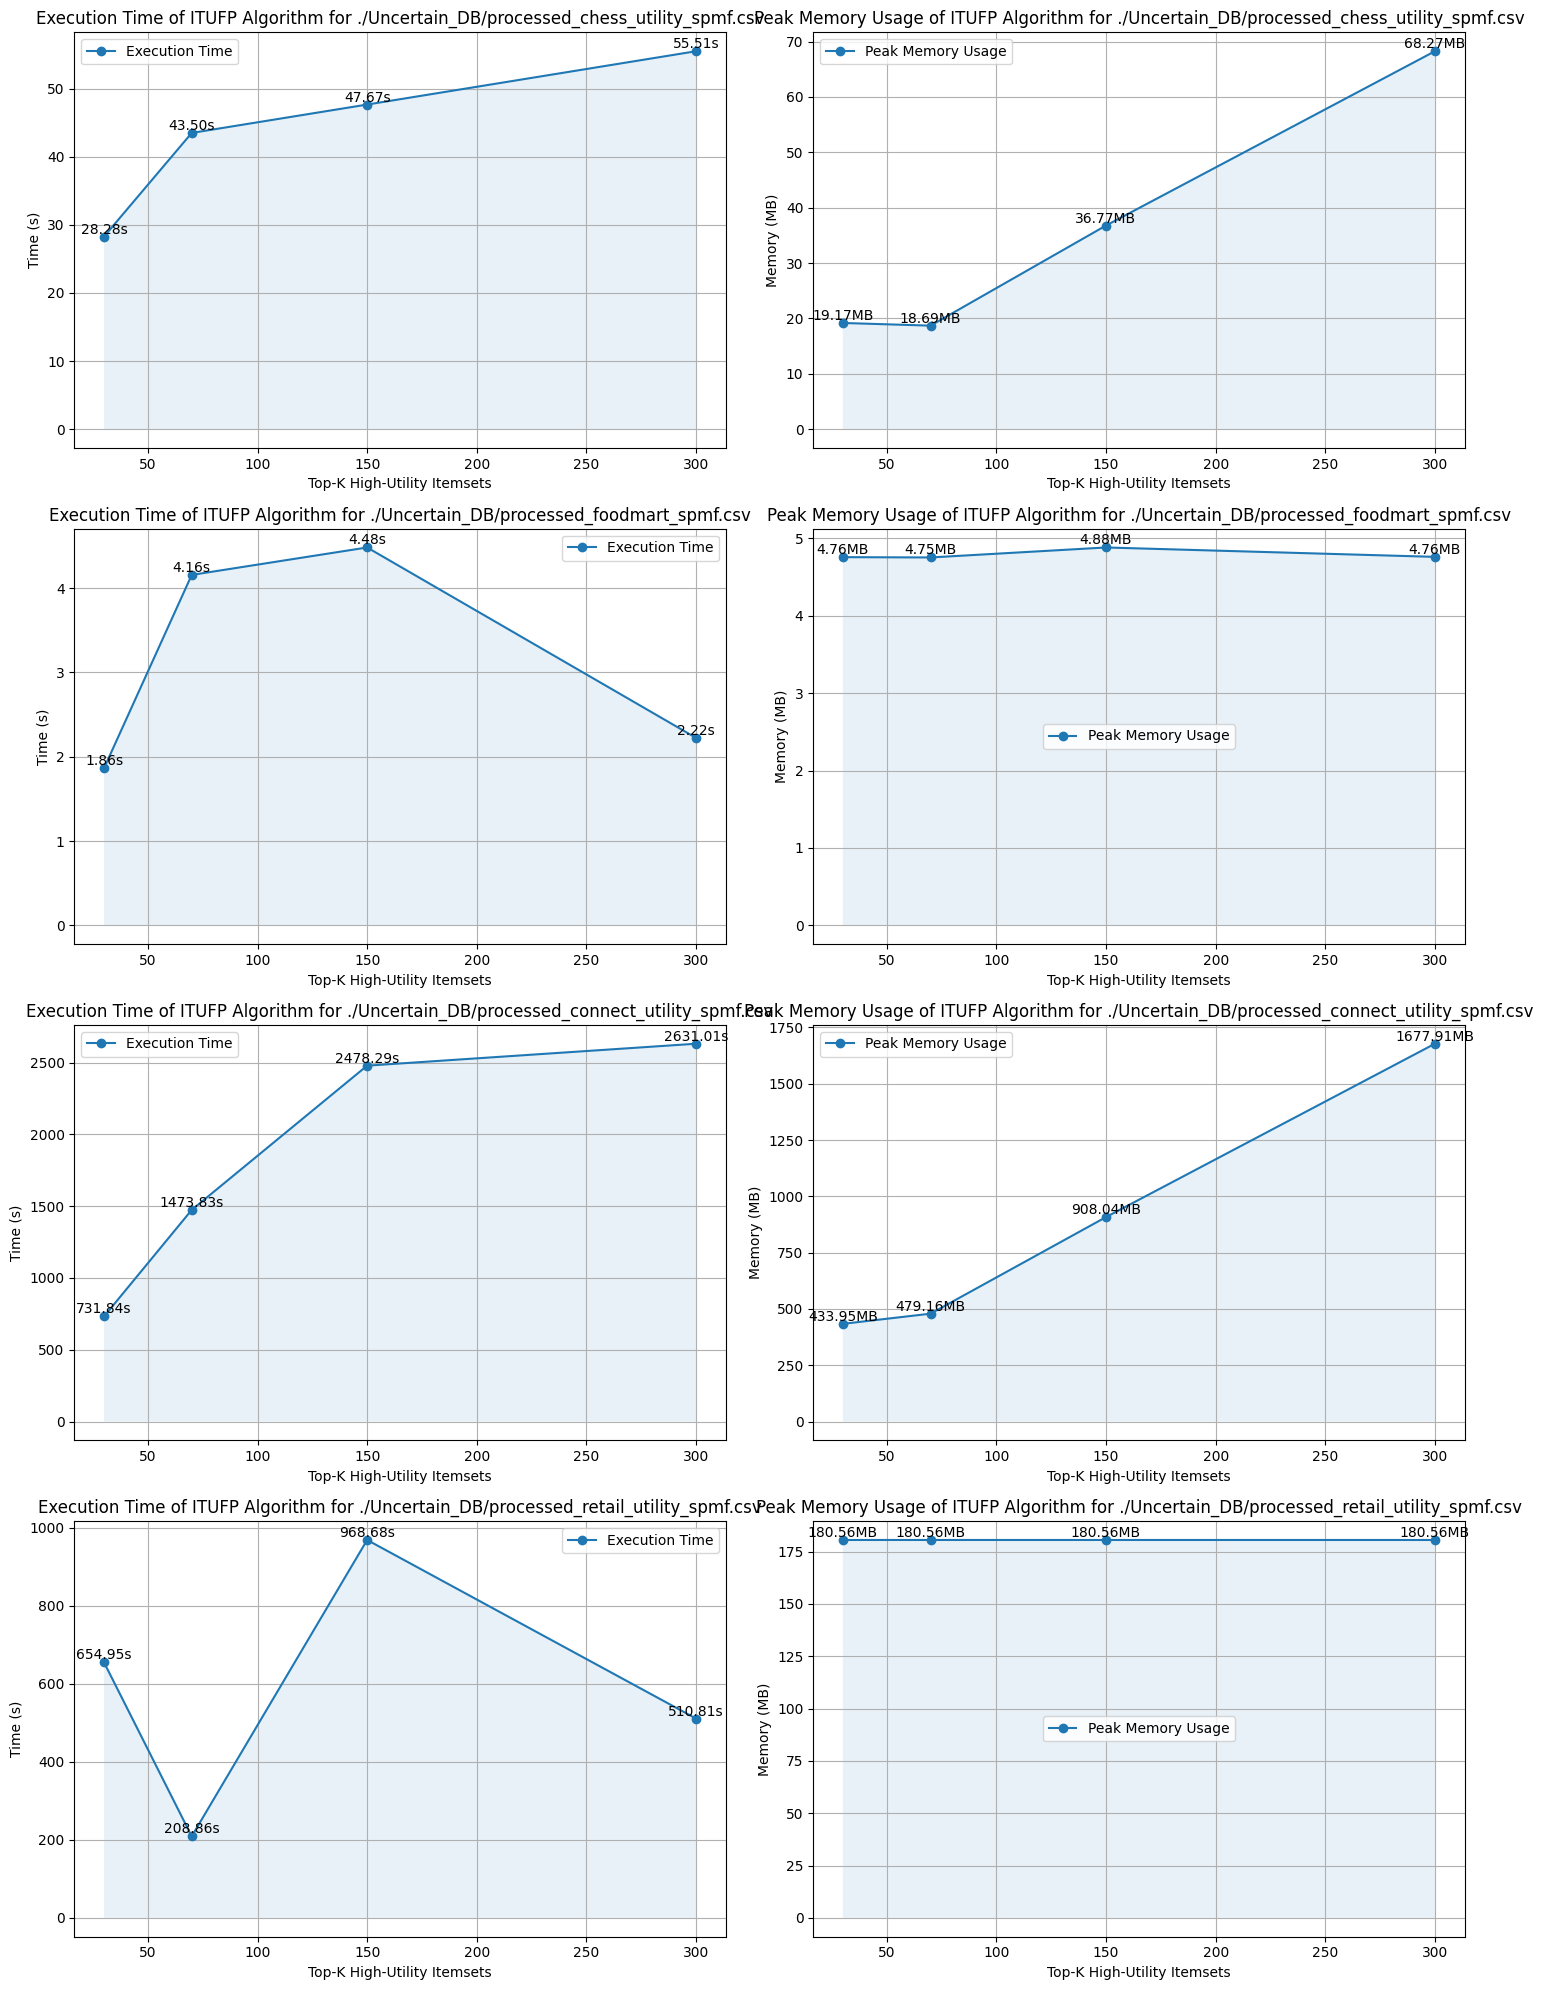

In [82]:
# Danh sách các đường dẫn đến các file dữ liệu không chắc chắn
file_paths = [
    "./Uncertain_DB/processed_chess_utility_spmf.csv",
    "./Uncertain_DB/processed_foodmart_spmf.csv",
    "./Uncertain_DB/processed_connect_utility_spmf.csv",
    "./Uncertain_DB/processed_retail_utility_spmf.csv",
]

# Danh sách các giá trị K cần thử nghiệm
k_values = [30, 70, 150, 300]

# Tạo dictionary để lưu thời gian thực thi và bộ nhớ sử dụng cho mỗi dataset
times_dict = {file_path: [] for file_path in file_paths}
peak_memories_dict = {file_path: [] for file_path in file_paths}

for file_path in file_paths:
    for k in k_values:
        tracemalloc.start()

        udb = UDB(file_path)

        start_time = time.time()
        itufp = ITUFP(udb, k)
        itufp.run()
        end_time = time.time()

        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        elapsed_time = end_time - start_time
        peak_memory_usage = peak / (1024 * 1024)

        times_dict[file_path].append(elapsed_time)
        peak_memories_dict[file_path].append(peak_memory_usage)

        print(
            f"Dataset: {file_path}, K: {k}\n",
            f"Time started: {start_time:.2f}s, Time ended: {end_time:.2f}s, Time elapsed: {elapsed_time:.2f}s\n",
            f"Peak memory usage: {peak_memory_usage:.2f}MB",
        )

# Vẽ biểu đồ thời gian thực thi và bộ nhớ sử dụng
fig, axes = plt.subplots(len(file_paths), 2, figsize=(15, 5 * len(file_paths)))

for i, file_path in enumerate(file_paths):
    axes[i, 0].plot(k_values, times_dict[file_path], marker="o", label="Execution Time")
    axes[i, 0].fill_between(k_values, times_dict[file_path], alpha=0.1)
    for j, k in enumerate(k_values):
        axes[i, 0].text(
            k,
            times_dict[file_path][j],
            f"{times_dict[file_path][j]:.2f}s",
            ha="center",
            va="bottom",
        )
    axes[i, 0].set_xlabel("Top-K High-Utility Itemsets")
    axes[i, 0].set_ylabel("Time (s)")
    axes[i, 0].set_title(f"Execution Time of ITUFP Algorithm for {file_path}")
    axes[i, 0].legend()
    axes[i, 0].grid()

    axes[i, 1].plot(
        k_values, peak_memories_dict[file_path], marker="o", label="Peak Memory Usage"
    )
    axes[i, 1].fill_between(k_values, peak_memories_dict[file_path], alpha=0.1)
    for j, k in enumerate(k_values):
        axes[i, 1].text(
            k,
            peak_memories_dict[file_path][j],
            f"{peak_memories_dict[file_path][j]:.2f}MB",
            ha="center",
            va="bottom",
        )
    axes[i, 1].set_xlabel("Top-K High-Utility Itemsets")
    axes[i, 1].set_ylabel("Memory (MB)")
    axes[i, 1].set_title(f"Peak Memory Usage of ITUFP Algorithm for {file_path}")
    axes[i, 1].legend()
    axes[i, 1].grid()

plt.tight_layout()
plt.show()